In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic

conf_key = {'CHI':1163450153, 'CSCW':1195049314, 'UBI':1171345118, 'UIST':1166315290}

ori_paperyear_conf = {}
ori_citingpatent_conf = {}

df_paper_year = pd.read_csv("df_paper_year.tsv")
df_paper_pc2s_year = pd.read_csv("df_paper_pc2s_year.tsv")

for conf_name,conf_id in conf_key.items():
    ori_paperyear_conf[conf_name] = df_paper_year.loc[df_paper_year['conf_id']==conf_id]
    ori_citingpatent_conf[conf_name] = df_paper_pc2s_year.loc[df_paper_pc2s_year['conf_id']==conf_id]


paperyear_map_conf = {}
inv_paperyear_map_conf = {}
for conf, df in ori_paperyear_conf.items():
    paperyear_map = {}
    inv_paperyear_map = {}
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1] # paperid
        paperyear = str(row[1]).split(',')[0].split('\n')[2].split()[1] # paperyear 
        if paperyear not in paperyear_map.keys():
            paperyear_map[paperyear] = []    
        if paperid not in paperyear_map[paperyear]:
            paperyear_map[paperyear].append(paperid)
        inv_paperyear_map[paperid] = paperyear
    paperyear_map_conf[conf] = paperyear_map
    inv_paperyear_map_conf[conf] = inv_paperyear_map
print(">>> done paper year map construction")


citingpatent_map_conf = {}
citedpaper_map_conf = {}
for conf, df in ori_citingpatent_conf.items():
    citingpatent_map = {}
    citedpaper_map = {}
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[3].split()[1] # paperid
        patentid = str(row[1]).split(',')[0].split('\n')[4].split()[1] # patentid
        # paperyear
        if paperid not in inv_paperyear_map.keys(): continue
        paperyear = inv_paperyear_map[paperid]
        if paperyear not in citingpatent_map.keys():
            citingpatent_map[paperyear] = []
        if paperyear not in citedpaper_map.keys():
            citedpaper_map[paperyear] = []  
        citingpatent_map[paperyear].append(patentid)
        # unique cited paper this year
        if paperid not in citedpaper_map[paperyear]:
            citedpaper_map[paperyear].append(paperid)
    citingpatent_map_conf[conf] = citingpatent_map
    citedpaper_map_conf[conf] = citedpaper_map
print(">>> done citing data")


# In[15]:

ic()
#------------ analyze paper point -------------#
ori_citingpaper_conf = {}

df_cited = pd.read_csv('../dataAug10/mergeversiondata/papercited.tsv', usecols=[1,2])
for conf in ["CHI", "CSCW", "UbiComp", "UIST"]:
    new_df = pd.read_csv('../dataAug10/mergeversiondata/papercited_{}.tsv'.format(conf), usecols=[3,4])
    df_cited = df_cited.append(new_df, ignore_index=True)
df_paperid = pd.read_csv('../dataAug10/mergeversiondata/HCI_paperids.tsv', sep='\t')
df_paperid = df_paperid.drop_duplicates()

df_paper_cited = df_cited.merge(df_paperid, left_on='citedpaperid', right_on='paper_id')
df_paper_cited = df_paper_cited.drop_duplicates()
# df_paper_cited.head(3)
# citing paper
for conf_name,conf_id in conf_key.items():
    ori_citingpaper_conf[conf_name] = df_paper_cited.loc[df_paper_cited['conf_id']==conf_id]
ori_citingpaper_conf['CHI'].head(3)


# In[30]:

ic()
citingpaper_map_conf = {}
for conf, df in ori_citingpaper_conf.items():
    citingpaper_map = {}
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    count = 0
    for row in df.iterrows():
        citing_paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        cited_paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        # paperyear
        if cited_paperid not in inv_paperyear_map.keys():
            count += 1
            continue
        paperyear = inv_paperyear_map[cited_paperid]
        if paperyear not in citingpaper_map.keys():
            citingpaper_map[paperyear] = []
        citingpaper_map[paperyear].append(citing_paperid)
    citingpaper_map_conf[conf] = citingpaper_map
print(">>> citing paper map construction done; count {}".format(count))


# In[34]:


ic(len(citingpaper_map_conf['CHI']))




>>> done paper year map construction


ic| 1736372501.py:65 in <cell line: 65>() at 23:09:20.928


>>> done citing data


/tmp/ipykernel_4038482/1736372501.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cited = df_cited.append(new_df, ignore_index=True)
/tmp/ipykernel_4038482/1736372501.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cited = df_cited.append(new_df, ignore_index=True)
/tmp/ipykernel_4038482/1736372501.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cited = df_cited.append(new_df, ignore_index=True)
/tmp/ipykernel_4038482/1736372501.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cited = df_cited.append(new_df, ignore_index=True)
ic| 1736372501.py:87 in <cell line: 87>() at 23:09:21.638
ic| len(citingpaper_ma

>>> citing paper map construction done; count 1


42

In [2]:

# In[9]:

ic()
# TODO: apply get_patentid
single_citingpaper_map_conf = {}
for conf, df in ori_citingpaper_conf.items():
    single_citingpaper_map = {}
    for row in df.iterrows():
        citing_paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        cited_paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        if cited_paperid not in single_citingpaper_map.keys():
            single_citingpaper_map[cited_paperid] = []
        if citing_paperid not in single_citingpaper_map[cited_paperid]:
            single_citingpaper_map[cited_paperid].append(citing_paperid)
    single_citingpaper_map_conf[conf] = single_citingpaper_map
print(">>> single citing paper map construction done")





ic| 901276194.py:3 in <cell line: 3>() at 23:16:01.125
ic| 901276194.py:21 in <cell line: 21>() at 23:22:36.650


>>> single citing paper map construction done
>>> done single citing data


In [8]:
# In[20]:

ic()
# TODO: apply get_patentid
single_citingpatent_map_conf = {}
for conf, df in ori_citingpatent_conf.items():
    single_citingpatent_map = {}
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[5].split()[1] # paperid
        patentid = str(row[1]).split(',')[0].split('\n')[6].split()[1] # patentid
        if paperid not in single_citingpatent_map.keys():
            single_citingpatent_map[paperid] = []
        if patentid not in single_citingpatent_map[paperid]:
            single_citingpatent_map[paperid].append(patentid)

    single_citingpatent_map_conf[conf] = single_citingpatent_map
print(">>> done single citing data")

ic| 121722981.py:3 in <cell line: 3>() at 23:29:30.354


>>> done single citing data


In [9]:
len(single_citingpaper_map_conf["UIST"])

1674

ic| 3612109592.py:3 in <cell line: 3>() at 23:38:21.681
ic| Y_citingpapercnt[0]: 91, Y_citingpatentcnt[0]: 124
ic| conf: 'CHI'
    stats.pearsonr(Y_citingpapercnt, Y_citingpatentcnt): (0.2799491572105285, 8.86427e-318)
ic| Y_citingpapercnt[0]: 88, Y_citingpatentcnt[0]: 25
ic| conf: 'CSCW'
    stats.pearsonr(Y_citingpapercnt, Y_citingpatentcnt): (0.4503272105407081, 2.7656497491411204e-148)
ic| Y_citingpapercnt[0]: 382, Y_citingpatentcnt[0]: 161
ic| conf: 'UBI'
    stats.pearsonr(Y_citingpapercnt, Y_citingpatentcnt): (0.2591245215882414, 1.95077937591434e-87)
ic| Y_citingpapercnt[0]: 128, Y_citingpatentcnt[0]: 124
ic| conf: 'UIST'
    stats.pearsonr(Y_citingpapercnt, Y_citingpatentcnt): (0.5938698671961838, 4.081315044510147e-160)


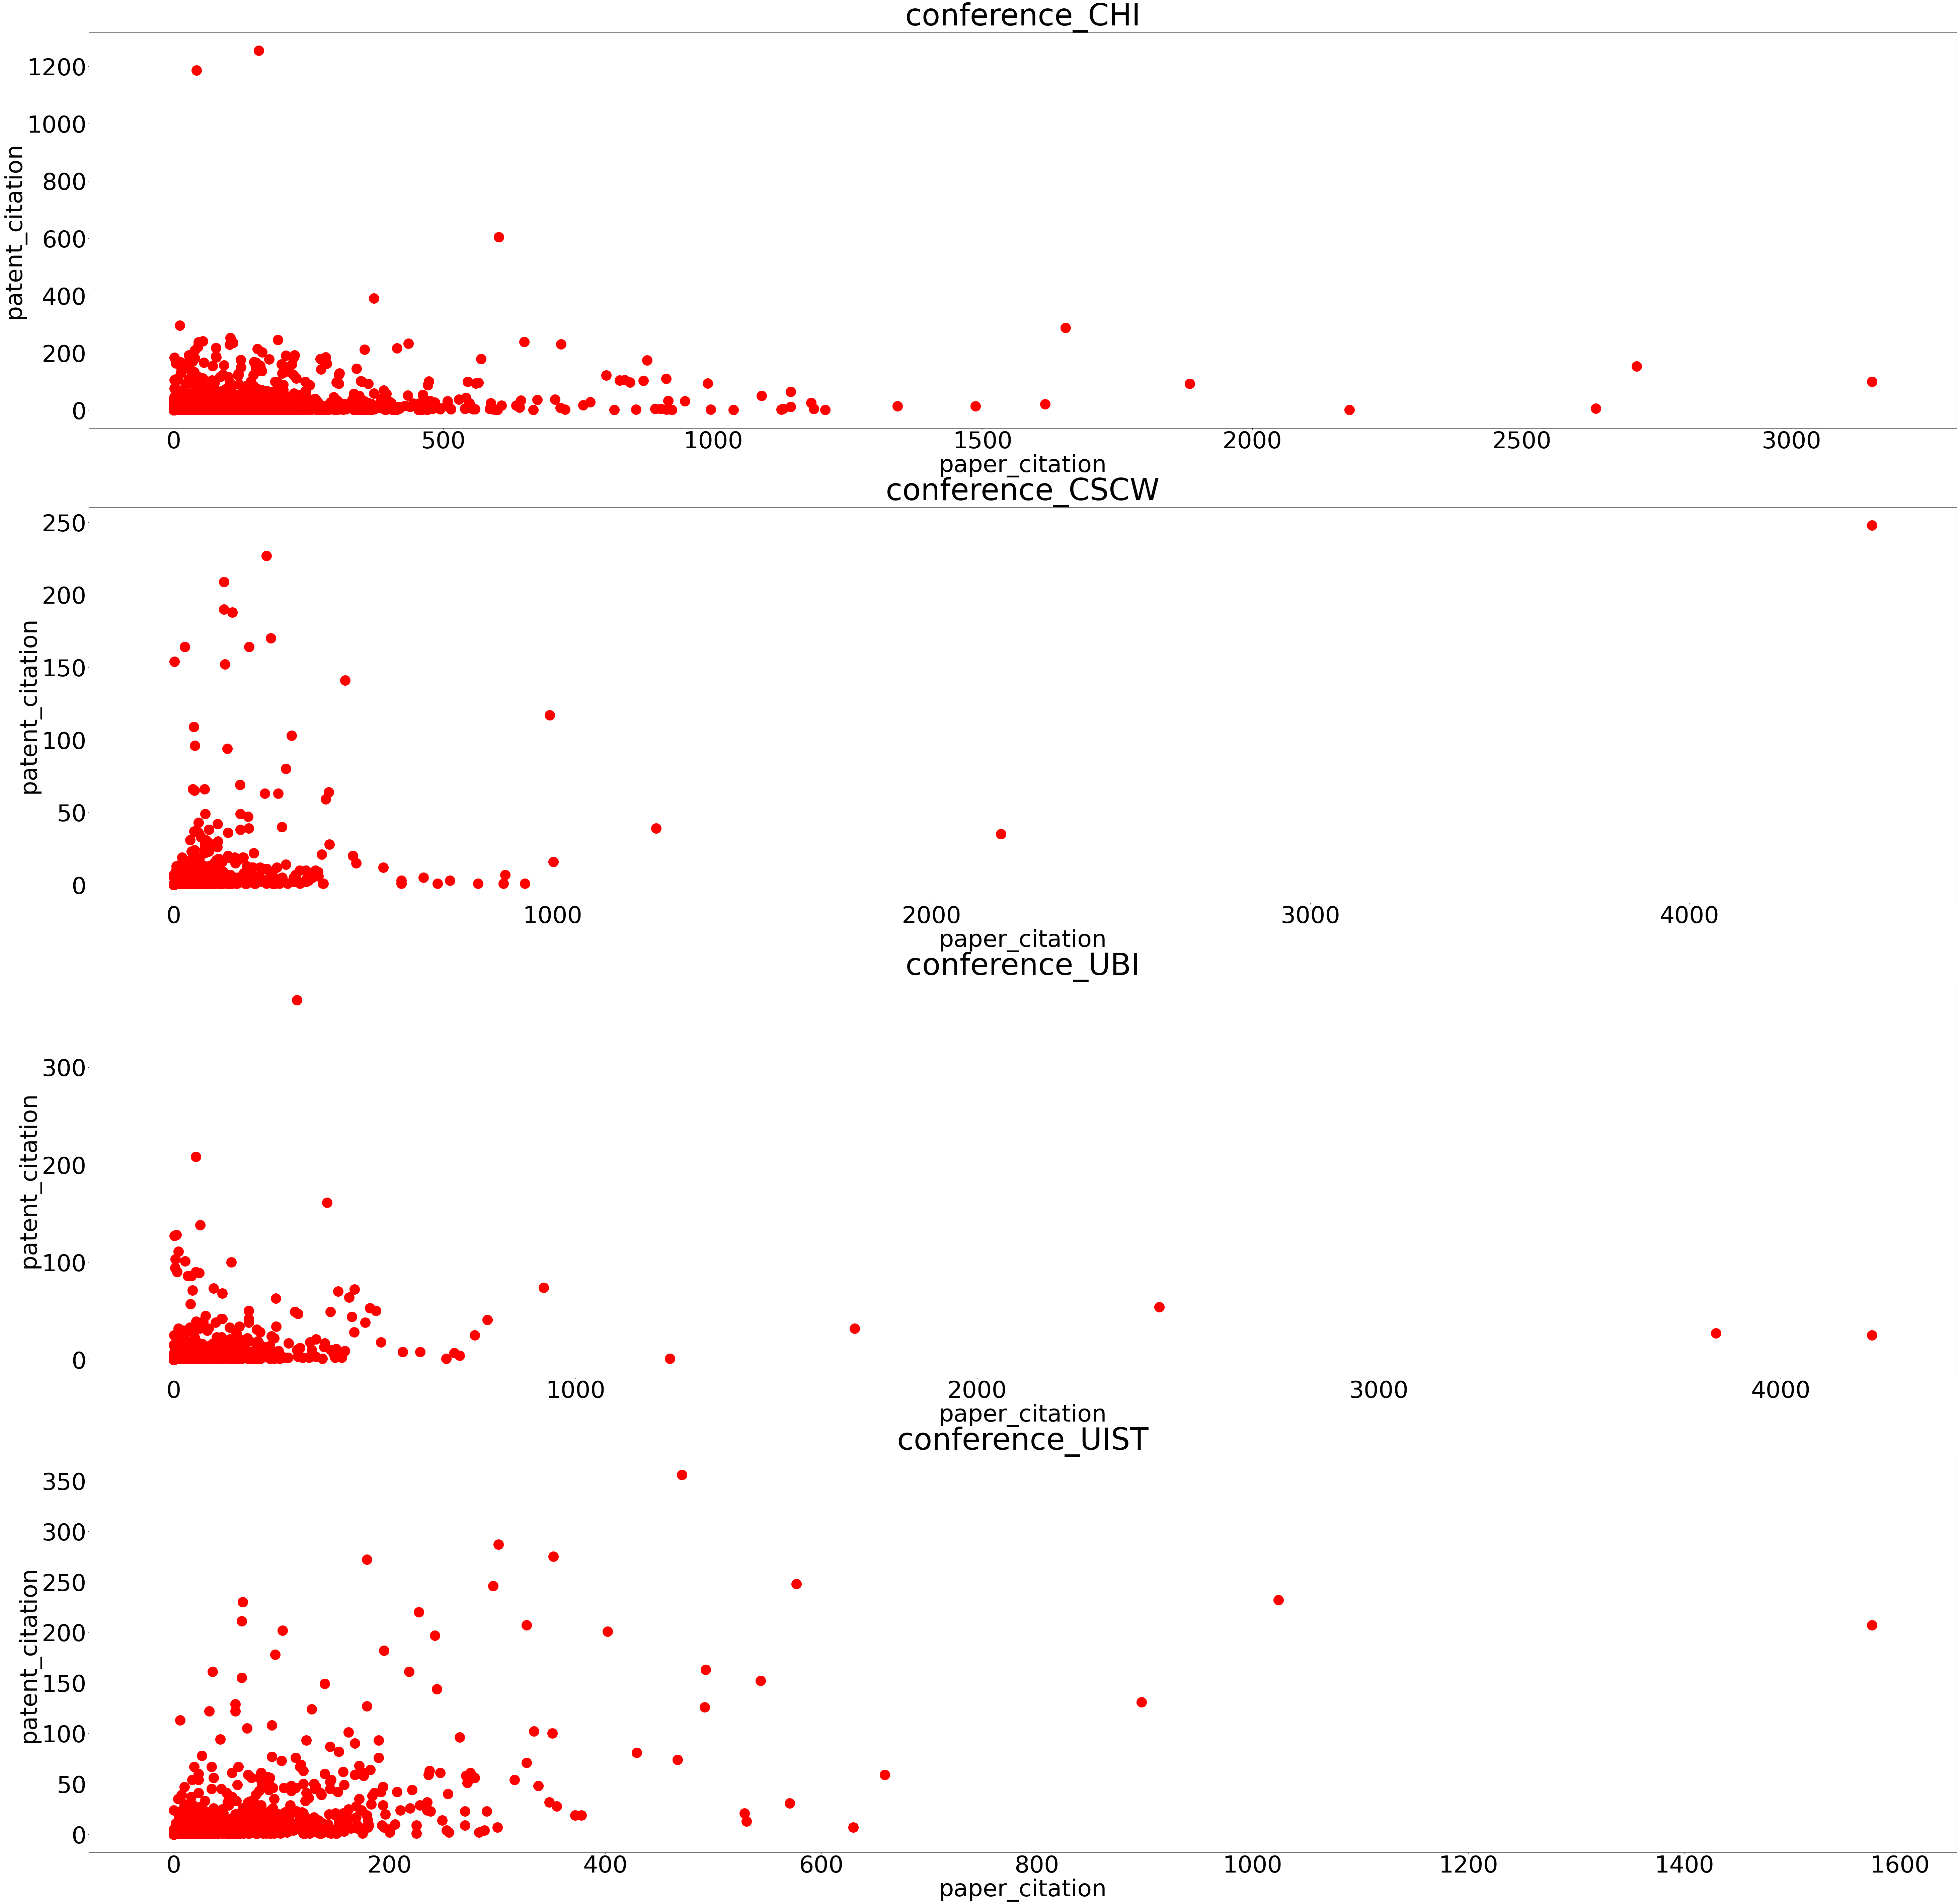

In [13]:


# In[21]:

ic()
# single point visualization
from scipy import stats
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_citation", fontsize=70)
    ax_c.set_ylabel("patent_citation", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0

for conf, paperyear_map in paperyear_map_conf.items():
    citingpatent_map = single_citingpatent_map_conf[conf]
    citingpaper_map = single_citingpaper_map_conf[conf]
    Y_citingpatentcnt = [0] * max(len(citingpatent_map), len(citingpaper_map))
    Y_citingpapercnt = [0] * max(len(citingpatent_map), len(citingpaper_map))
    idx = 0
    for key, val in citingpatent_map.items():
        Y_citingpatentcnt[idx] = len(val)
        if key in citingpaper_map:
            Y_citingpapercnt[idx] = len(citingpaper_map[key])
        else:
            Y_citingpapercnt[idx] = 0
        idx += 1
    ic(Y_citingpapercnt[0], Y_citingpatentcnt[0])
    ic(conf, stats.pearsonr(Y_citingpapercnt, Y_citingpatentcnt))
    axes[plot_idx].plot(Y_citingpapercnt,Y_citingpatentcnt,'o',color='r',markersize=30)
    axes[plot_idx].set_title('conference_{}'.format(conf), fontsize=90)
    plot_idx += 1
